# Adjusting pmax for lumefantrine and artemisinin 

In [2]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator

In [178]:
command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--pmf",  "2", "--ec50_lum", "12", "--ec50_art", "0.8", "--pmax_lum", "0.9", "--pmax_art", "0.9"]

output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
lines_100_patients = output_100_patients.stdout.splitlines()
df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
df_100_patients = df_100_patients.iloc[1:]
df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [31]:
df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,4.489,2717.906,10758.946
3,0,2.0,22.379,4501.588,6267.460
4,0,3.0,19.446,5641.608,4097.639
5,0,4.0,12.060,6339.187,2849.524
...,...,...,...,...,...
67196,99,667.0,-0.000,119.448,0.000
67197,99,668.0,-0.000,118.932,0.000
67198,99,669.0,-0.000,118.419,0.000
67199,99,670.0,-0.000,117.908,0.000


In [286]:
#Converting 0s to 0.0001 to avoid log(0) error
#df_100_patients['PARASITEDENSITY'] = df_100_patients['PARASITEDENSITY'].replace(0.000, 0.0001)
#Creating new column with log(parasite density)
df_100_patients['LOG_PARASITEDENSITY'] = np.log10(df_100_patients['PARASITEDENSITY'] + 0.00001)

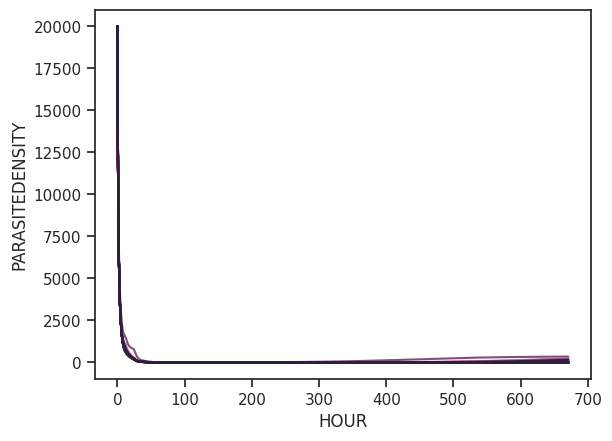

In [287]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()

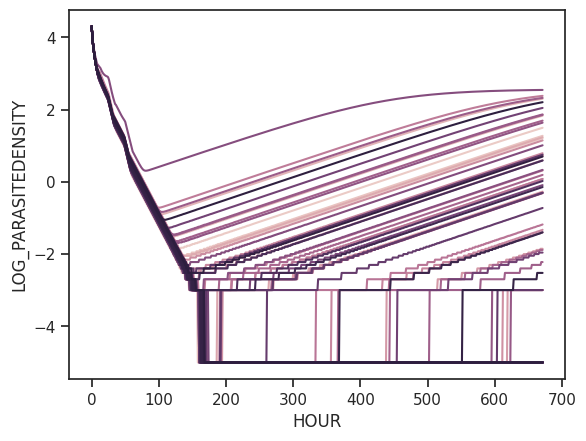

In [288]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()

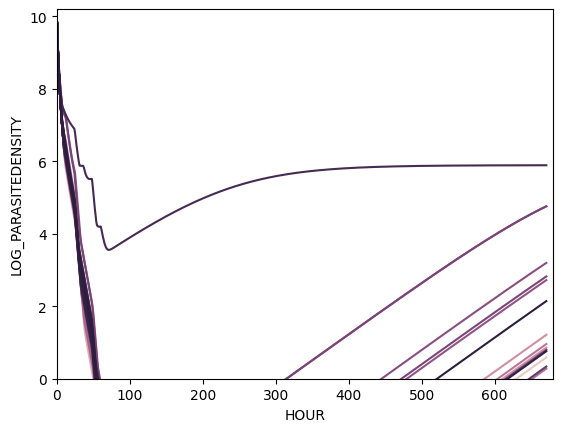

In [35]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
ax = sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
ax.set_ylim(0, 10.2)
ax.set_xlim(0, 680)

#tick_positions = range(0, int(df_100_patients['HOUR'].max()) + 1, 24)
#ax.set_xticks(tick_positions)

#ax.set_xticklabels(tick_positions, rotation=90)

# Hide minor ticks
#ax.xaxis.set_minor_locator(plt.NullLocator())

plt.show()

In [185]:
df_100_patients_day28_failed = df_100_patients[(df_100_patients['PARASITEDENSITY'] >= 10) & (df_100_patients['HOUR'] == 671.0)]
df_100_patients_day28_failed_pids = df_100_patients_day28_failed['PID'].unique().tolist()
df_100_patients_day28_failed_pids = np.array(df_100_patients_day28_failed_pids)


In [296]:
df_100_patients_day28_failed['PID'].unique().tolist()

[2, 3, 6, 9, 13, 17, 31, 39, 52, 53, 56, 57, 61, 65, 66, 72, 98]

In [260]:
df_100_patients[(df_100_patients['PID']) == 4]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,STATUS
2689,4,0.0,0.000,0.000,20000.000,Cleared
2690,4,1.0,9.707,917.126,10675.589,Cleared
2691,4,2.0,23.232,1704.941,6519.352,Cleared
2692,4,3.0,14.385,2378.202,4450.052,Cleared
2693,4,4.0,7.756,2950.076,3226.928,Cleared
...,...,...,...,...,...,...
3356,4,667.0,0.000,121.275,0.000,Cleared
3357,4,668.0,0.000,120.752,0.000,Cleared
3358,4,669.0,0.000,120.232,0.000,Cleared
3359,4,670.0,0.000,119.714,0.000,Cleared


In [187]:
df_100_patients['STATUS'] = np.where(df_100_patients['PID'].isin(df_100_patients_day28_failed_pids), 'Failed', 'Cleared')

In [188]:
df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,STATUS
1,0,0.0,0.000,0.000,20000.000,Cleared
2,0,1.0,29.558,448.080,10487.887,Cleared
3,0,2.0,17.828,856.620,6435.148,Cleared
4,0,3.0,9.801,1228.280,4403.089,Cleared
5,0,4.0,5.388,1565.558,3197.398,Cleared
...,...,...,...,...,...,...
67196,99,667.0,0.000,145.633,0.000,Cleared
67197,99,668.0,0.000,145.019,0.000,Cleared
67198,99,669.0,0.000,144.408,0.000,Cleared
67199,99,670.0,0.000,143.799,0.000,Cleared


In [87]:
df_100_patients_cleared = df_100_patients[df_100_patients['STATUS'] == 'Cleared']
df_100_patients_failed = df_100_patients[df_100_patients['STATUS'] == 'Failed']

In [262]:
df_100_patients_cleared[(df_100_patients_cleared['PID']) == 4]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,STATUS
2689,4,0.0,0.000,0.000,20000.000,Cleared
2690,4,1.0,9.707,917.126,10675.589,Cleared
2691,4,2.0,23.232,1704.941,6519.352,Cleared
2692,4,3.0,14.385,2378.202,4450.052,Cleared
2693,4,4.0,7.756,2950.076,3226.928,Cleared
...,...,...,...,...,...,...
3356,4,667.0,0.000,121.275,0.000,Cleared
3357,4,668.0,0.000,120.752,0.000,Cleared
3358,4,669.0,0.000,120.232,0.000,Cleared
3359,4,670.0,0.000,119.714,0.000,Cleared


In [266]:
df_100_patients_failed[(df_100_patients_failed['PID']) == 3]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,STATUS
2017,3,0.0,0.000,0.000,20000.000,Failed
2018,3,1.0,2.754,3677.130,10973.763,Failed
2019,3,2.0,19.783,5692.609,6665.172,Failed
2020,3,3.0,21.236,6741.355,4530.909,Failed
2021,3,4.0,14.370,7229.603,3277.584,Failed
...,...,...,...,...,...,...
2684,3,667.0,0.000,112.186,29.706,Failed
2685,3,668.0,0.000,111.699,30.102,Failed
2686,3,669.0,0.000,111.214,30.503,Failed
2687,3,670.0,0.000,110.730,30.909,Failed


In [256]:
df_100_patients_day28_failed_pids

array([ 2,  3,  6,  9, 13, 17, 31, 39, 52, 53, 56, 57, 61, 65, 66, 72, 98])

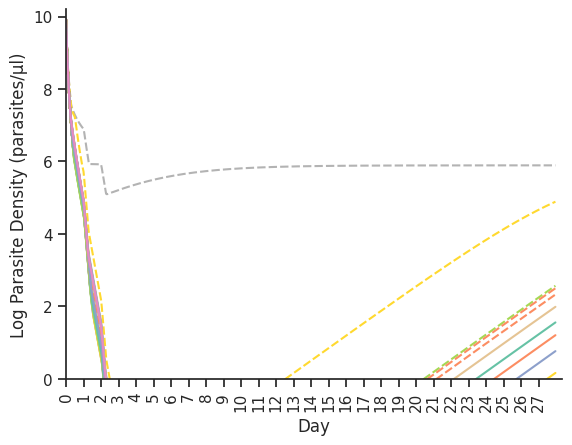

In [106]:
#Plot Parasitemia
# Colours for Cleared and Failed


#palette_status = {'Cleared': "#B22222", 'Failed': "#98FF98"} 

#Creating a spaghetti plot using seaborn
ax = sns.lineplot(x='HOUR',y='LOG_PARASITEDENSITY',data = df_100_patients, hue = 'PID', style= 'STATUS', palette = "Set2", legend= False)
sns.despine()

ax.set_ylim(0, 10.2)
ax.set_xlim(0, 680)

tick_positions = range(0, int(df_100_patients['HOUR'].max()) + 1, 24)
ax.set_xticks(tick_positions)

# Convert hour ticks to days
tick_labels = [int(hour / 24) for hour in tick_positions]
ax.set_xticklabels(tick_labels, rotation=90)

# Set x-axis label
ax.set_xlabel('Day')

#Set y-axis label
ax.set_ylabel('Log Parasite Density (parasites/μl)')    

# Hide minor ticks
ax.xaxis.set_minor_locator(plt.NullLocator())

plt.show()

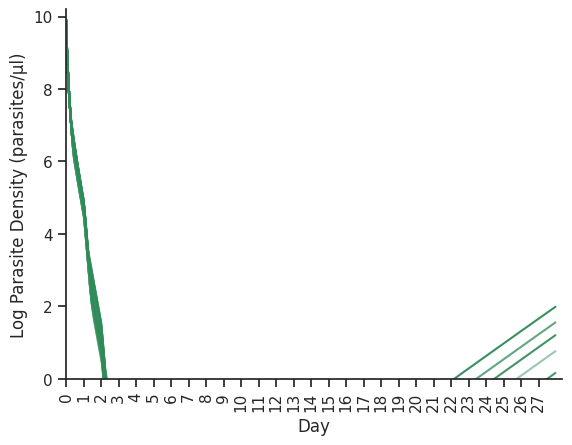

In [120]:
ax1 = sns.lineplot(x='HOUR',y='LOG_PARASITEDENSITY',data = df_100_patients_cleared, hue = 'PID', palette= sns.light_palette("seagreen", as_cmap=True), legend= False)
sns.despine()

ax1.set_ylim(0, 10.2)
ax1.set_xlim(0, 680)

tick_positions = range(0, int(df_100_patients['HOUR'].max()) + 1, 24)
ax1.set_xticks(tick_positions)

# Convert hour ticks to days
tick_labels = [int(hour / 24) for hour in tick_positions]
ax1.set_xticklabels(tick_labels, rotation=90)

# Set x-axis label
ax1.set_xlabel('Day')

#Set y-axis label
ax1.set_ylabel('Log Parasite Density (parasites/μl)')    

# Hide minor ticks
ax1.xaxis.set_minor_locator(plt.NullLocator())

plt.show()

In [267]:
df_100_patients_cleared[(df_100_patients_cleared['HOUR'] == 671.0)]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,STATUS
672,0,671.0,0.0,133.037,0.000,Cleared
1344,1,671.0,0.0,111.484,4.985,Cleared
3360,4,671.0,0.0,119.198,0.000,Cleared
4032,5,671.0,0.0,126.679,0.000,Cleared
5376,7,671.0,0.0,119.387,0.000,Cleared
...,...,...,...,...,...,...
63840,94,671.0,-0.0,165.112,0.000,Cleared
64512,95,671.0,0.0,124.724,0.000,Cleared
65184,96,671.0,0.0,116.728,0.003,Cleared
65856,97,671.0,0.0,111.943,5.014,Cleared


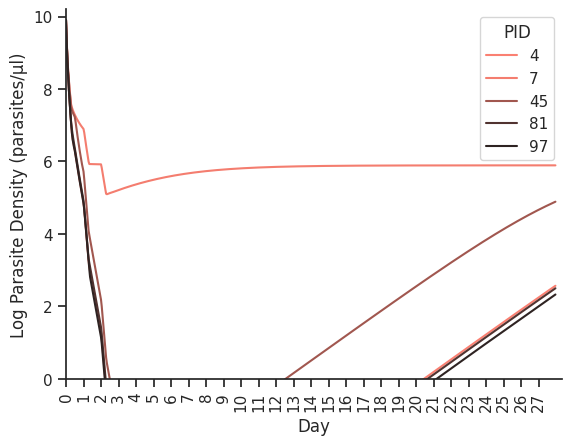

In [119]:
ax2 = sns.lineplot(x='HOUR',y='LOG_PARASITEDENSITY',data = df_100_patients_failed, hue = 'PID', palette= sns.color_palette("dark:salmon_r", as_cmap=True), legend= True)
sns.despine()

ax2.set_ylim(0, 10.2)
ax2.set_xlim(0, 680)

tick_positions = range(0, int(df_100_patients['HOUR'].max()) + 1, 24)
ax2.set_xticks(tick_positions)

# Convert hour ticks to days
tick_labels = [int(hour / 24) for hour in tick_positions]
ax2.set_xticklabels(tick_labels, rotation=90)

# Set x-axis label
ax2.set_xlabel('Day')

#Set y-axis label
ax2.set_ylabel('Log Parasite Density (parasites/μl)')    

# Hide minor ticks
ax2.xaxis.set_minor_locator(plt.NullLocator())

plt.show()

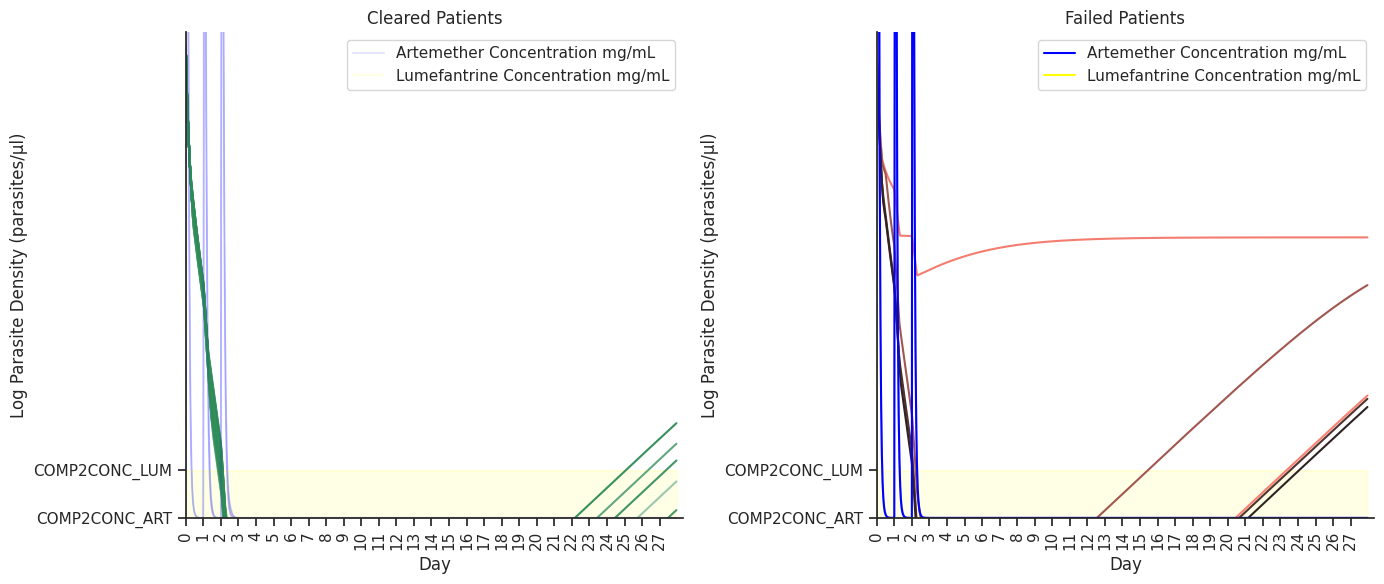

In [144]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot df_100_patients_cleared on the first subplot
ax1 = sns.lineplot(ax=axes[0], x='HOUR', y='LOG_PARASITEDENSITY', data=df_100_patients_cleared, hue='PID', palette=sns.light_palette("seagreen", as_cmap=True), legend=False)
sns.despine(ax=ax1)
ax1.set_ylim(0, 10.2)
ax1.set_xlim(0, 680)
tick_positions = range(0, int(df_100_patients_cleared['HOUR'].max()) + 1, 24)
ax1.set_xticks(tick_positions)
# Convert hour ticks to days
tick_labels = [int(hour / 24) for hour in tick_positions]
ax1.set_xticklabels(tick_labels, rotation=90)
# Set x-axis label
ax1.set_xlabel('Day')
#Set y-axis label
ax1.set_ylabel('Log Parasite Density (parasites/μl)') 
#Set plot title
ax1.set_title('Cleared Patients')
# Hide minor ticks
ax1.xaxis.set_minor_locator(plt.NullLocator())

# Overlay comp2conc_art and comp2conc_lum on the first subplot
sns.lineplot(ax=axes[0], x='HOUR', y='COMP2CONC_ART', data=df_100_patients_cleared, color='blue', label='Artemether Concentration mg/mL')
sns.lineplot(ax=axes[0], x='HOUR', y='COMP2CONC_LUM', data=df_100_patients_cleared, color='yellow', label='Lumefantrine Concentration mg/mL')
axes[0].fill_between(df_100_patients_cleared['HOUR'],'COMP2CONC_ART', color='blue', alpha=0.1)
axes[0].fill_between(df_100_patients_cleared['HOUR'],'COMP2CONC_LUM', color='yellow', alpha=0.1)


# Plot df_100_patients_failed on the second subplot
ax2 = sns.lineplot(ax=axes[1], x='HOUR', y='LOG_PARASITEDENSITY', data=df_100_patients_failed, hue='PID', palette=sns.color_palette("dark:salmon_r", as_cmap=True), legend=False)
sns.despine(ax=ax2) 
ax2.set_ylim(0, 10.2)
ax2.set_xlim(0, 680)
tick_positions = range(0, int(df_100_patients_failed['HOUR'].max()) + 1, 24)
ax2.set_xticks(tick_positions)
# Convert hour ticks to days
tick_labels = [int(hour / 24) for hour in tick_positions]
ax2.set_xticklabels(tick_labels, rotation=90)
# Set x-axis label
ax2.set_xlabel('Day')
#Set y-axis label
ax2.set_ylabel('Log Parasite Density (parasites/μl)')
#Set plot title
ax2.set_title('Failed Patients') 
# Hide minor ticks
ax2.xaxis.set_minor_locator(plt.NullLocator())

# Overlay comp2conc_art and comp2conc_lum on the first subplot
sns.lineplot(ax=axes[1], x='HOUR', y='COMP2CONC_ART', data=df_100_patients_failed, color='blue', label='Artemether Concentration mg/mL')
sns.lineplot(ax=axes[1], x='HOUR', y='COMP2CONC_LUM', data=df_100_patients_failed, color='yellow', label='Lumefantrine Concentration mg/mL')
axes[1].fill_between(df_100_patients_failed['HOUR'],'COMP2CONC_ART', color='blue', alpha=0.1, )
axes[1].fill_between(df_100_patients_failed['HOUR'],'COMP2CONC_LUM', color='yellow', alpha=0.1)

plt.tight_layout()
plt.show()

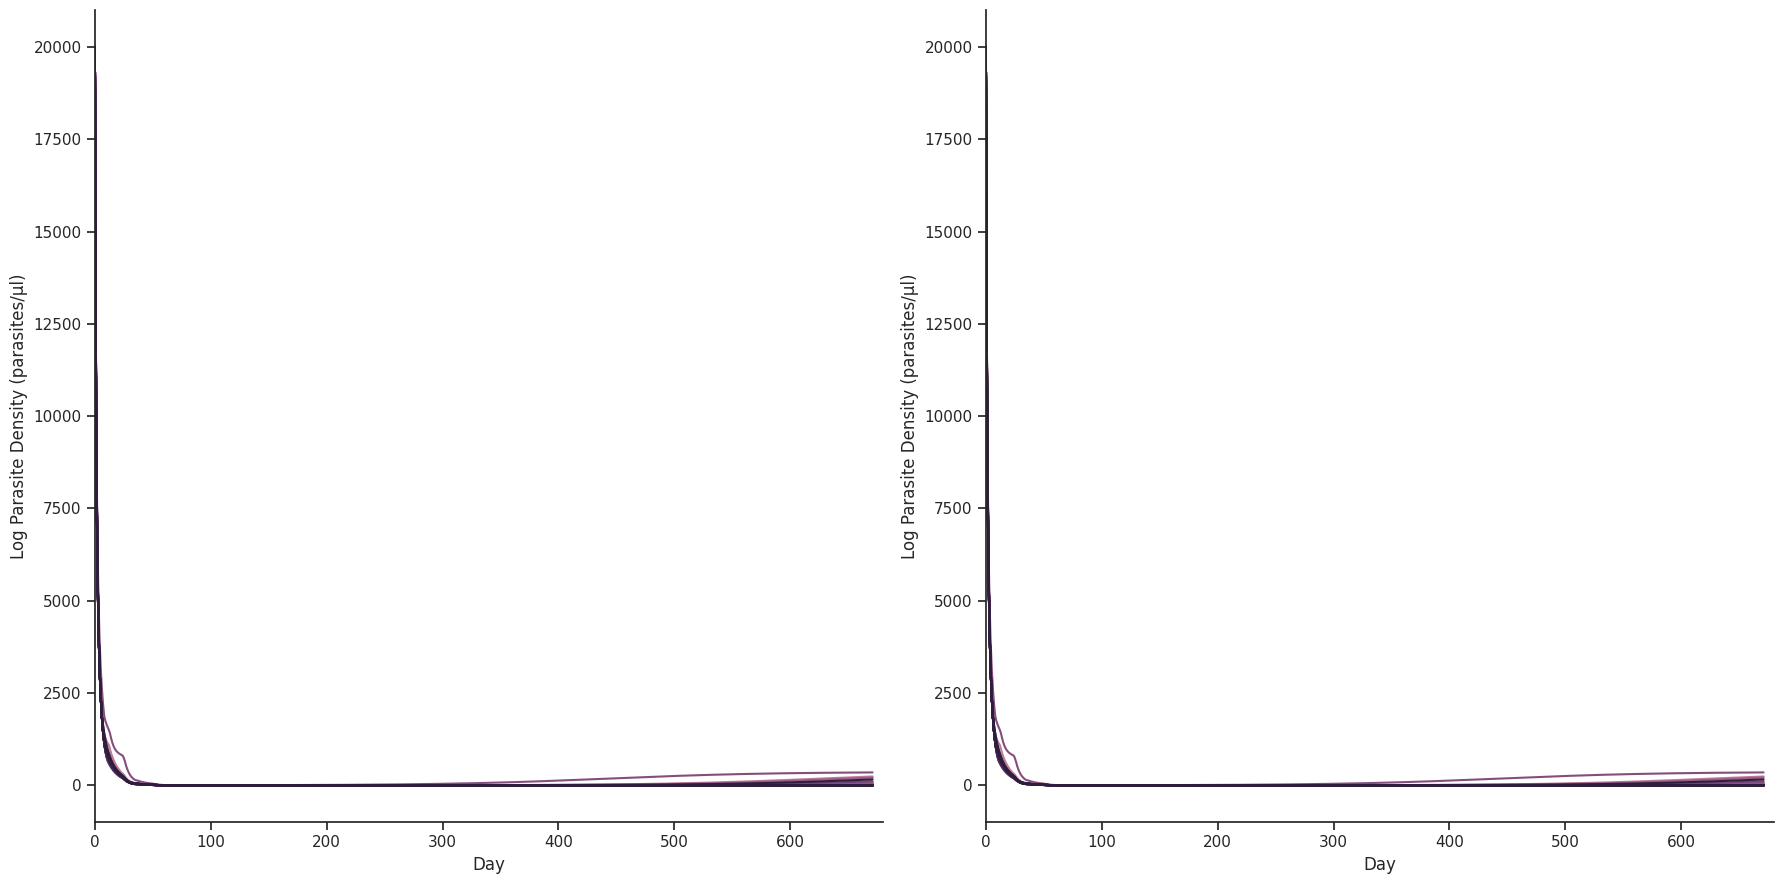

In [184]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

ax1 = sns.lineplot(ax=axes[0], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
sns.despine(ax=ax1)
ax1.set_xlim(0, 680)
#ax1.set_yticks(range(0, int(df_100_patients['PARASITEDENSITY'].max()) + 100, 1000))
#Set x-axis label
ax1.set_xlabel('Day')
#Set y-axis label
ax1.set_ylabel('Log Parasite Density (parasites/μl)') 


ax2 = sns.lineplot(ax=axes[1], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
sns.despine(ax=ax2)
ax2.set_xlim(0, 680)
#Set x-axis label
ax2.set_xlabel('Day')
#Set y-axis label
ax2.set_ylabel('Log Parasite Density (parasites/μl)') 

fig.savefig('parasitemia.png')
plt.tight_layout()
plt.show()

In [268]:
df_100_patients[(df_100_patients['PARASITEDENSITY'] >= 10) & (df_100_patients['HOUR'] == 671.0)]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,STATUS
2016,2,671.0,0.0,111.119,16.053,Failed
2688,3,671.0,0.0,110.249,31.320,Failed
4704,6,671.0,0.0,110.526,18.770,Failed
6720,9,671.0,0.0,109.949,67.658,Failed
9408,13,671.0,-0.0,109.224,199.245,Failed
12096,17,671.0,0.0,110.891,17.067,Failed
21504,31,671.0,0.0,110.677,14.015,Failed
26880,39,671.0,0.0,109.133,239.598,Failed
35616,52,671.0,0.0,109.993,70.875,Failed
36288,53,671.0,0.0,110.239,49.351,Failed


In [269]:
df_100_patients_cleared = df_100_patients[df_100_patients['STATUS'] == 'Cleared']
df_100_patients_failed = df_100_patients[df_100_patients['STATUS'] == 'Failed']

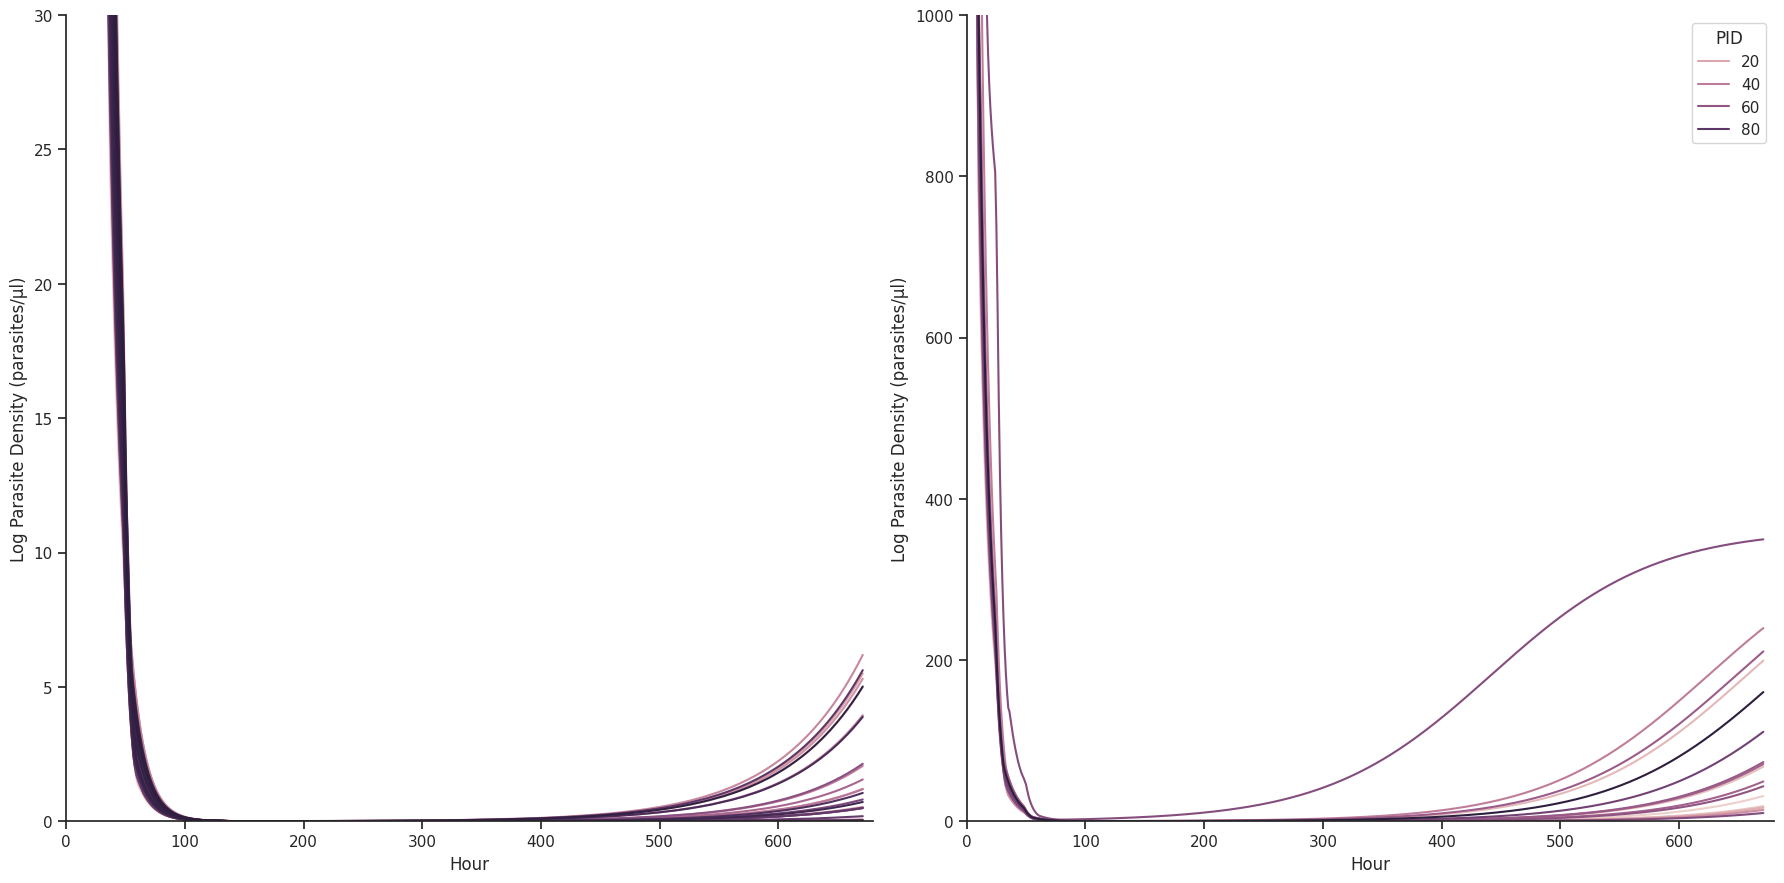

In [193]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

ax1 = sns.lineplot(ax=axes[0], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients_cleared, legend=False)
sns.despine(ax=ax1)
ax1.set_xlim(0, 680)
#ax1.set_yticks(range(0, int(df_100_patients['PARASITEDENSITY'].max()) + 100, 1000))
ax1.set_ylim(0, 30)
#Set x-axis label
ax1.set_xlabel('Hour')
#Set y-axis label
ax1.set_ylabel('Log Parasite Density (parasites/μl)') 


ax2 = sns.lineplot(ax=axes[1], x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients_failed, legend=True)
sns.despine(ax=ax2)
ax2.set_xlim(0, 680)
ax2.set_ylim(0, 1000)
#Set x-axis label
ax2.set_xlabel('Hour')
#Set y-axis label
ax2.set_ylabel('Log Parasite Density (parasites/μl)') 

fig.savefig('parasitemia.png')
plt.tight_layout()
plt.show()

In [270]:
df_100_patients_cleared_wide = df_100_patients_cleared.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_cleared_wide

PID,0,1,4,5,7,8,10,11,12,14,...,89,90,91,92,93,94,95,96,97,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,...,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
1.0,10487.887,10904.767,10675.589,10510.972,10534.676,11041.823,10702.799,10549.882,10549.684,10522.411,...,10603.079,10445.640,10623.021,10450.644,10454.872,10471.553,10599.490,10853.108,10522.070,10462.466
2.0,6435.148,6623.963,6519.352,6445.572,6456.373,6689.754,6531.133,6463.097,6462.877,6450.721,...,6486.686,6416.034,6496.884,6418.399,6420.909,6427.730,6485.254,6598.205,6452.865,6423.674
3.0,4403.089,4508.088,4450.052,4408.915,4414.948,4544.407,4456.605,4418.702,4418.579,4411.791,...,4431.860,4392.398,4437.543,4393.721,4395.125,4398.941,4431.062,4493.828,4412.991,4396.672
4.0,3197.398,3263.308,3226.928,3201.065,3204.862,3286.009,3231.042,3207.224,3207.147,3202.876,...,3215.499,3190.663,3219.071,3191.496,3192.381,3194.785,3214.997,3254.380,3203.631,3193.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,0.000,4.709,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.677,0.000,0.037,0.000,0.000,0.003,4.736,0.000
668.0,0.000,4.776,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.687,0.000,0.038,0.000,0.000,0.003,4.804,0.000
669.0,0.000,4.845,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.697,0.000,0.039,0.000,0.000,0.003,4.873,0.000


In [271]:
df_100_patients_failed_wide = df_100_patients_failed.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_failed_wide

PID,2,3,6,9,13,17,31,39,52,53,56,57,61,65,66,72,98
HOUR,,,,,,,,,,,,,,,,,
0.0,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
1.0,10562.459,10973.763,11141.178,10737.302,10729.085,10622.629,11025.067,10859.457,10663.178,10662.796,10826.547,10662.261,10577.439,10879.238,10698.233,10666.004,10659.057
2.0,6473.229,6665.172,6917.125,6571.156,6721.629,6501.394,6681.075,6848.521,6536.029,6527.766,6729.046,6533.085,6487.220,7129.370,6534.242,6567.712,6599.899
3.0,4424.362,4530.909,4668.928,4479.020,4586.043,4440.065,4539.639,4689.470,4459.480,4454.792,4579.213,4457.808,4432.198,5188.742,4458.341,4478.002,4498.575
4.0,3210.785,3277.584,3363.469,3245.133,3325.023,3220.656,3283.033,3413.650,3232.871,3229.911,3314.002,3231.815,3215.716,4005.823,3232.132,3244.755,3258.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,15.190,29.706,17.768,64.537,194.050,16.152,13.257,234.865,67.640,46.940,205.506,70.104,41.241,348.941,9.697,106.583,155.082
668.0,15.402,30.102,18.014,65.306,195.351,16.377,13.443,236.056,68.438,47.533,206.789,70.924,41.772,349.127,9.834,107.673,156.364
669.0,15.616,30.503,18.262,66.083,196.650,16.604,13.631,237.242,69.243,48.133,208.070,71.751,42.308,349.311,9.973,108.769,157.649


In [272]:

# Calculate the median, 25th percentile, and 75th percentile for cleared and failed
median_parasite_density_cleared = df_100_patients_cleared_wide.median(axis=1)
perc_05_parasite_density_cleared = df_100_patients_cleared_wide.quantile(0.05,axis=1)
perc_95_parasite_density_cleared = df_100_patients_cleared_wide.quantile(0.95,axis=1)

median_parasite_density_failed = df_100_patients_failed_wide.median(axis=1)
perc_05_parasite_density_failed = df_100_patients_failed_wide.quantile(0.05,axis=1)
perc_95_parasite_density_failed = df_100_patients_failed_wide.quantile(0.95,axis=1)


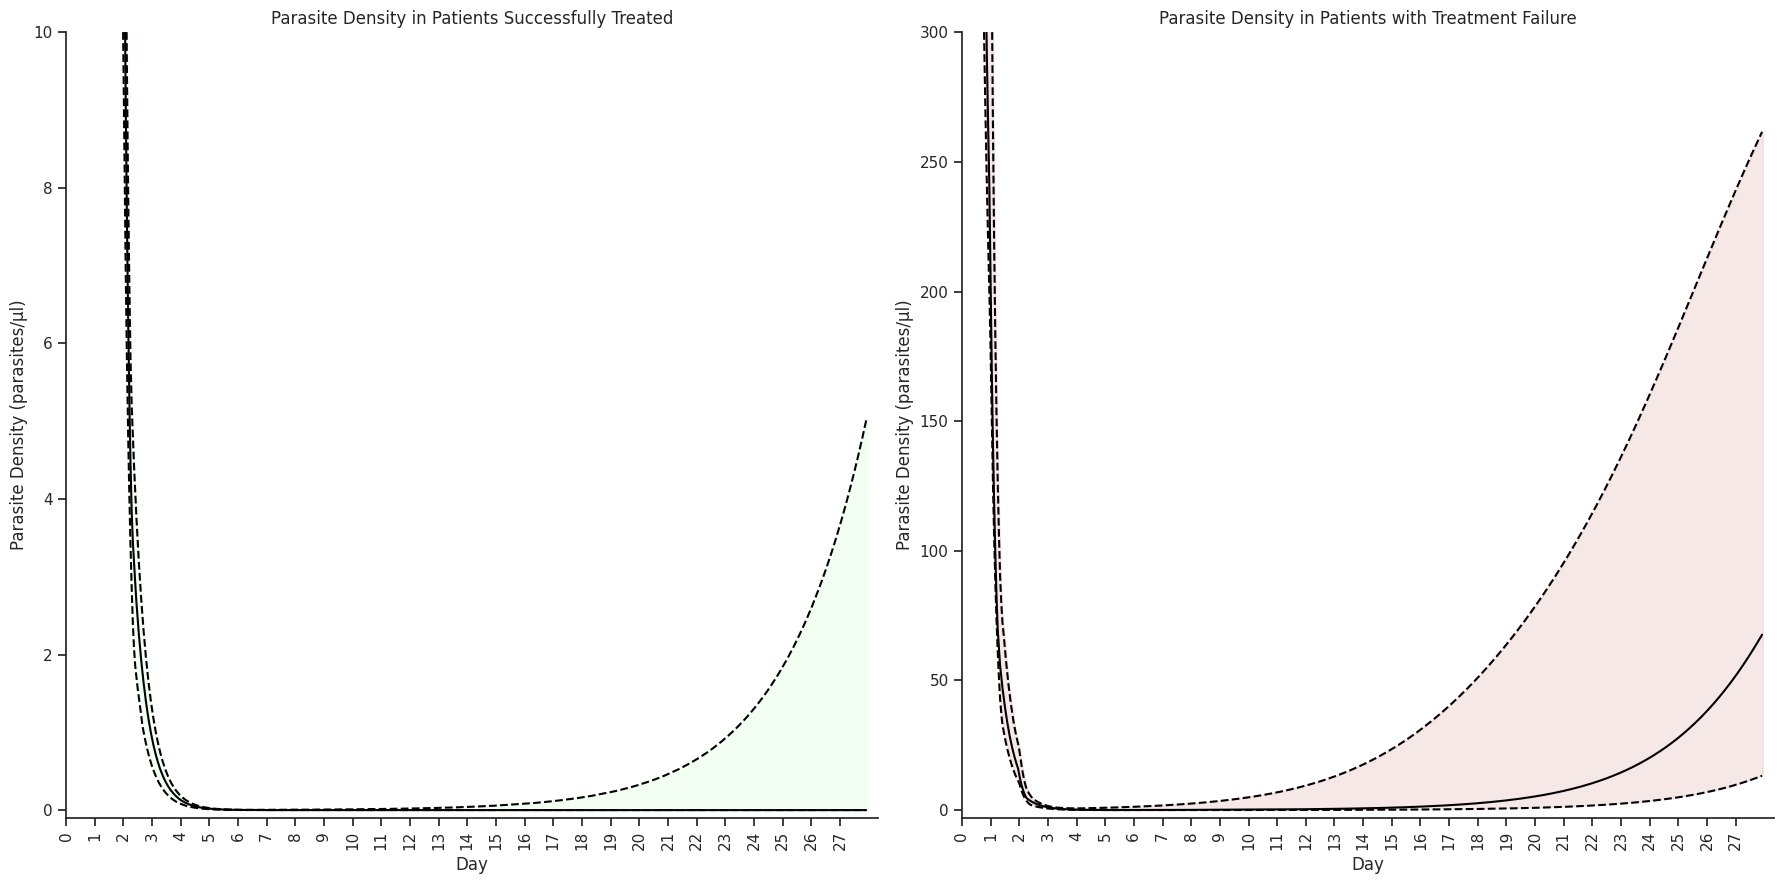

In [285]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

colors = ["#B22222", "#98FF98"]
sns.set_palette(sns.color_palette(colors))

ax1 = sns.lineplot(ax=axes[0], x= df_100_patients['HOUR'], y= median_parasite_density_cleared, color="black")
sns.lineplot(ax=axes[0], x=df_100_patients['HOUR'], y=perc_05_parasite_density_cleared, color="black", linestyle='--')
sns.lineplot(ax=axes[0], x=df_100_patients['HOUR'], y=perc_95_parasite_density_cleared, color="black", linestyle='--')
axes[0].fill_between(np.arange(672),perc_05_parasite_density_cleared, perc_95_parasite_density_cleared, color="#98FF98", alpha=0.1)

sns.despine(ax=ax1)


ax1.set_xlim(0, 680)
#ax1.set_yticks(range(0, int(df_100_patients['PARASITEDENSITY'].max()) + 100, 1000))
ax1.set_ylim(-0.1, 10)
#Set x-axis label
ax1.set_xlabel('Day')
#Set y-axis label
ax1.set_ylabel('Parasite Density (parasites/μl)')
tick_positions = range(0, int(df_100_patients_failed['HOUR'].max()) + 1, 24)
ax1.set_xticks(tick_positions)
# Convert hour ticks to days
tick_labels = [int(hour / 24) for hour in tick_positions]
ax1.set_xticklabels(tick_labels, rotation=90)
#Plot title
ax1.set_title('Parasite Density in Patients Successfully Treated')


ax2 = sns.lineplot(ax=axes[1], x= df_100_patients['HOUR'], y= median_parasite_density_failed, color="black")
sns.lineplot(ax=axes[1], x=df_100_patients['HOUR'], y=perc_05_parasite_density_failed, color="black", linestyle='--')
sns.lineplot(ax=axes[1], x=df_100_patients['HOUR'], y=perc_95_parasite_density_failed, color="black", linestyle='--')
axes[1].fill_between(np.arange(672), perc_05_parasite_density_failed, perc_95_parasite_density_failed, color="#B22222", alpha=0.1)

sns.despine(ax=ax2)

ax2.set_xlim(0, 680)
ax2.set_ylim(-3, 300)
#Set x-axis label
ax2.set_xlabel('Day')
#Set y-axis label
ax2.set_ylabel('Parasite Density (parasites/μl)')
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels, rotation=90)
#Plot title
ax2.set_title('Parasite Density in Patients with Treatment Failure')



plt.tight_layout()
plt.show()

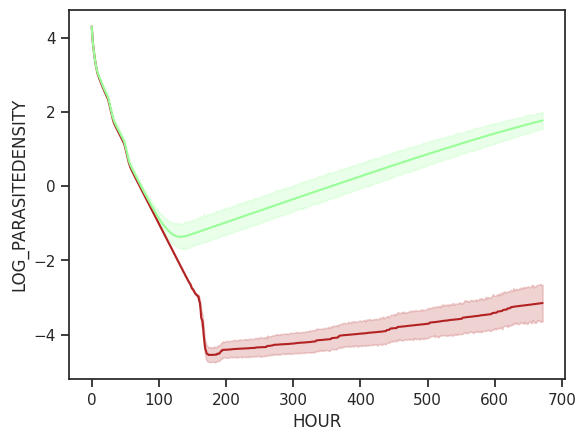

In [290]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='STATUS', data=df_100_patients, legend=False)
plt.show()

In [331]:
df_100_patients_cleared_wide_log = df_100_patients_cleared.pivot(index="HOUR", columns="PID", values="LOG_PARASITEDENSITY")
df_100_patients_cleared_wide_log

PID,0,1,4,5,7,8,10,11,12,14,...,89,90,91,92,93,94,95,96,97,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,...,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030
1.0,4.020688,4.037616,4.028392,4.021643,4.022621,4.043041,4.029497,4.023248,4.023239,4.022115,...,4.025432,4.018935,4.026248,4.019143,4.019319,4.020011,4.025285,4.035554,4.022101,4.019634
2.0,3.808559,3.821118,3.814204,3.809261,3.809989,3.825410,3.814989,3.810441,3.810426,3.809608,...,3.812023,3.807267,3.812705,3.807427,3.807597,3.808058,3.811927,3.819426,3.809753,3.807783
3.0,3.643757,3.653992,3.648365,3.644332,3.644926,3.657477,3.649004,3.645295,3.645283,3.644615,...,3.646586,3.642702,3.647143,3.642832,3.642971,3.643348,3.646508,3.652616,3.644733,3.643124
4.0,3.504797,3.513658,3.508789,3.505294,3.505809,3.516669,3.509343,3.506129,3.506119,3.505540,...,3.507248,3.503881,3.507731,3.503994,3.504115,3.504442,3.507181,3.512468,3.505642,3.504247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,-5.000000,0.672930,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-0.169405,-5.000000,-1.431681,-5.000000,-5.000000,-2.521434,0.675413,-5.000000
668.0,-5.000000,0.679065,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-0.163037,-5.000000,-1.420102,-5.000000,-5.000000,-2.521434,0.681604,-5.000000
669.0,-5.000000,0.685295,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-0.156761,-5.000000,-1.408824,-5.000000,-5.000000,-2.521434,0.687797,-5.000000


In [332]:
df_100_patients_failed_wide_log = df_100_patients_failed.pivot(index="HOUR", columns="PID", values="LOG_PARASITEDENSITY")
df_100_patients_failed_wide_log

PID,2,3,6,9,13,17,31,39,52,53,56,57,61,65,66,72,98
HOUR,,,,,,,,,,,,,,,,,
0.0,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030,4.301030
1.0,4.023765,4.040356,4.046931,4.030895,4.030563,4.026232,4.042381,4.035808,4.027887,4.027871,4.034490,4.027849,4.024381,4.036598,4.029312,4.028002,4.027719
2.0,3.811121,3.823811,3.839926,3.817642,3.827475,3.813006,3.824846,3.835597,3.815314,3.814765,3.827953,3.815118,3.812059,3.853051,3.815195,3.817414,3.819537
3.0,3.645851,3.656185,3.669217,3.651183,3.661438,3.647389,3.657021,3.671124,3.649284,3.648827,3.660791,3.649121,3.646619,3.715062,3.649173,3.651084,3.653075
4.0,3.506611,3.515554,3.526787,3.511233,3.521795,3.507944,3.516275,3.533219,3.509588,3.509191,3.520353,3.509446,3.507278,3.602692,3.509489,3.511182,3.513050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,1.181558,1.472844,1.249639,1.809809,2.287914,1.208227,1.122446,2.370818,1.830204,1.671543,2.312825,1.845743,1.615329,2.542752,0.986638,2.027688,2.190561
668.0,1.187577,1.478595,1.255610,1.814953,2.290816,1.214235,1.128497,2.373015,1.835297,1.676995,2.315527,1.850793,1.620885,2.542983,0.992731,2.032107,2.194137
669.0,1.193570,1.484343,1.261549,1.820090,2.293694,1.220213,1.134528,2.375192,1.840376,1.682443,2.318209,1.855828,1.626423,2.543212,0.998826,2.036505,2.197691


In [333]:

# Calculate the median, 25th percentile, and 75th percentile for cleared and failed using log parasite density
median_parasite_density_cleared_log = df_100_patients_cleared_wide_log.median(axis=1)
perc_05_parasite_density_cleared_log = df_100_patients_cleared_wide_log.quantile(0.05,axis=1)
perc_95_parasite_density_cleared_log = df_100_patients_cleared_wide_log.quantile(0.95,axis=1)

median_parasite_density_failed_log = df_100_patients_failed_wide_log.median(axis=1)
perc_05_parasite_density_failed_log = df_100_patients_failed_wide_log.quantile(0.05,axis=1)
perc_95_parasite_density_failed_log = df_100_patients_failed_wide_log.quantile(0.95,axis=1)

In [334]:
median_parasite_density_cleared_log

HOUR
0.0      4.301030
1.0      4.026153
2.0      3.812572
3.0      3.647034
4.0      3.507637
           ...   
667.0   -5.000000
668.0   -5.000000
669.0   -5.000000
670.0   -5.000000
671.0   -5.000000
Length: 672, dtype: float64

In [335]:
median_parasite_density_failed_log

HOUR
0.0      4.301030
1.0      4.029312
2.0      3.817642
3.0      3.651183
4.0      3.511233
           ...   
667.0    1.809809
668.0    1.814953
669.0    1.820090
670.0    1.825212
671.0    1.830319
Length: 672, dtype: float64

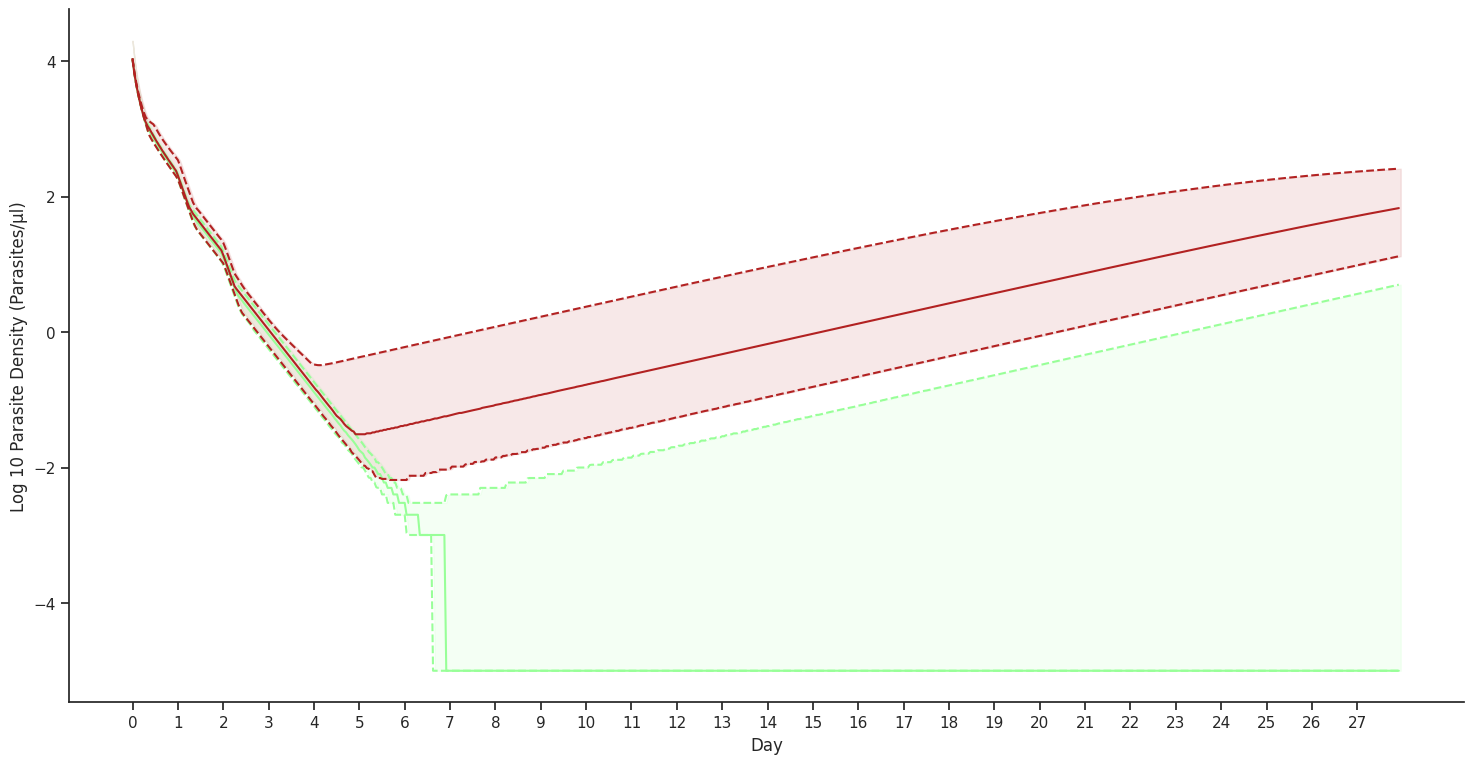

In [345]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
plt.figure(figsize=(18, 9))

palette_cleared = ["#e5ffe5","#cbffcb","#b2ffb2","#98FF98","#7fff7f","#65ff65","#4cff4c"]
palette_failed = ["#ffcbcb","#ff9797","#ff6464","#ff3232","#ff0000","#cb0000","#970000"] 
#sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', palette=sns.color_palette(palette_cleared, 83), data=df_100_patients_cleared, legend=False)
#sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', palette=sns.color_palette(palette_failed, 17), data=df_100_patients_failed, legend=False)

sns.lineplot(x= df_100_patients['HOUR'], y= median_parasite_density_cleared_log, color="#98FF98")
sns.lineplot(x=df_100_patients['HOUR'], y=perc_05_parasite_density_cleared_log, color="#98FF98", linestyle='--')
sns.lineplot(x=df_100_patients['HOUR'], y=perc_95_parasite_density_cleared_log, color="#98FF98", linestyle='--')
plt.fill_between(np.arange(672),perc_05_parasite_density_cleared_log, perc_95_parasite_density_cleared_log, color="#98FF98", alpha=0.1)

sns.lineplot(x= df_100_patients['HOUR'], y= median_parasite_density_failed_log, color="#B22222")
sns.lineplot(x=df_100_patients['HOUR'], y=perc_05_parasite_density_failed_log, color="#B22222", linestyle='--')
sns.lineplot(x=df_100_patients['HOUR'], y=perc_95_parasite_density_failed_log, color="#B22222", linestyle='--')
plt.fill_between(np.arange(672),perc_05_parasite_density_failed_log, perc_95_parasite_density_failed_log, color="#B22222", alpha=0.1)


sns.despine()

tick_positions = range(0, int(df_100_patients_failed['HOUR'].max()) + 1, 24)
tick_labels = [int(hour / 24) for hour in tick_positions]
plt.xticks(tick_positions, tick_labels)

plt.xlabel('Day')
plt.ylabel('Log 10 Parasite Density (Parasites/μl)')

plt.show()

[2, 3, 6, 9, 13, 17, 31, 39, 52, 53, 56, 57, 61, 65, 66, 72, 98]